In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


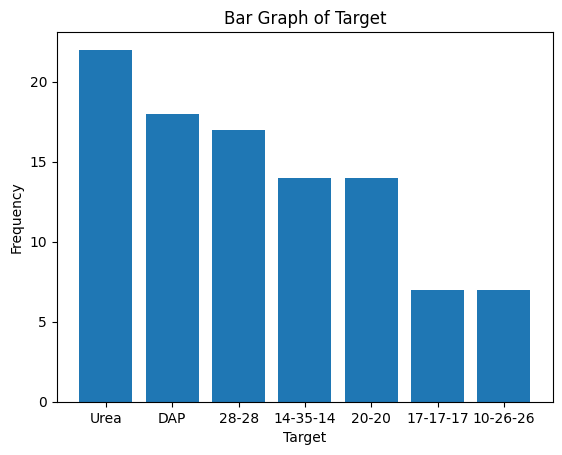

In [3]:
target_counts = df['Fertilizer Name'].value_counts()

plt.bar(target_counts.index, target_counts.values)
plt.title('Bar Graph of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

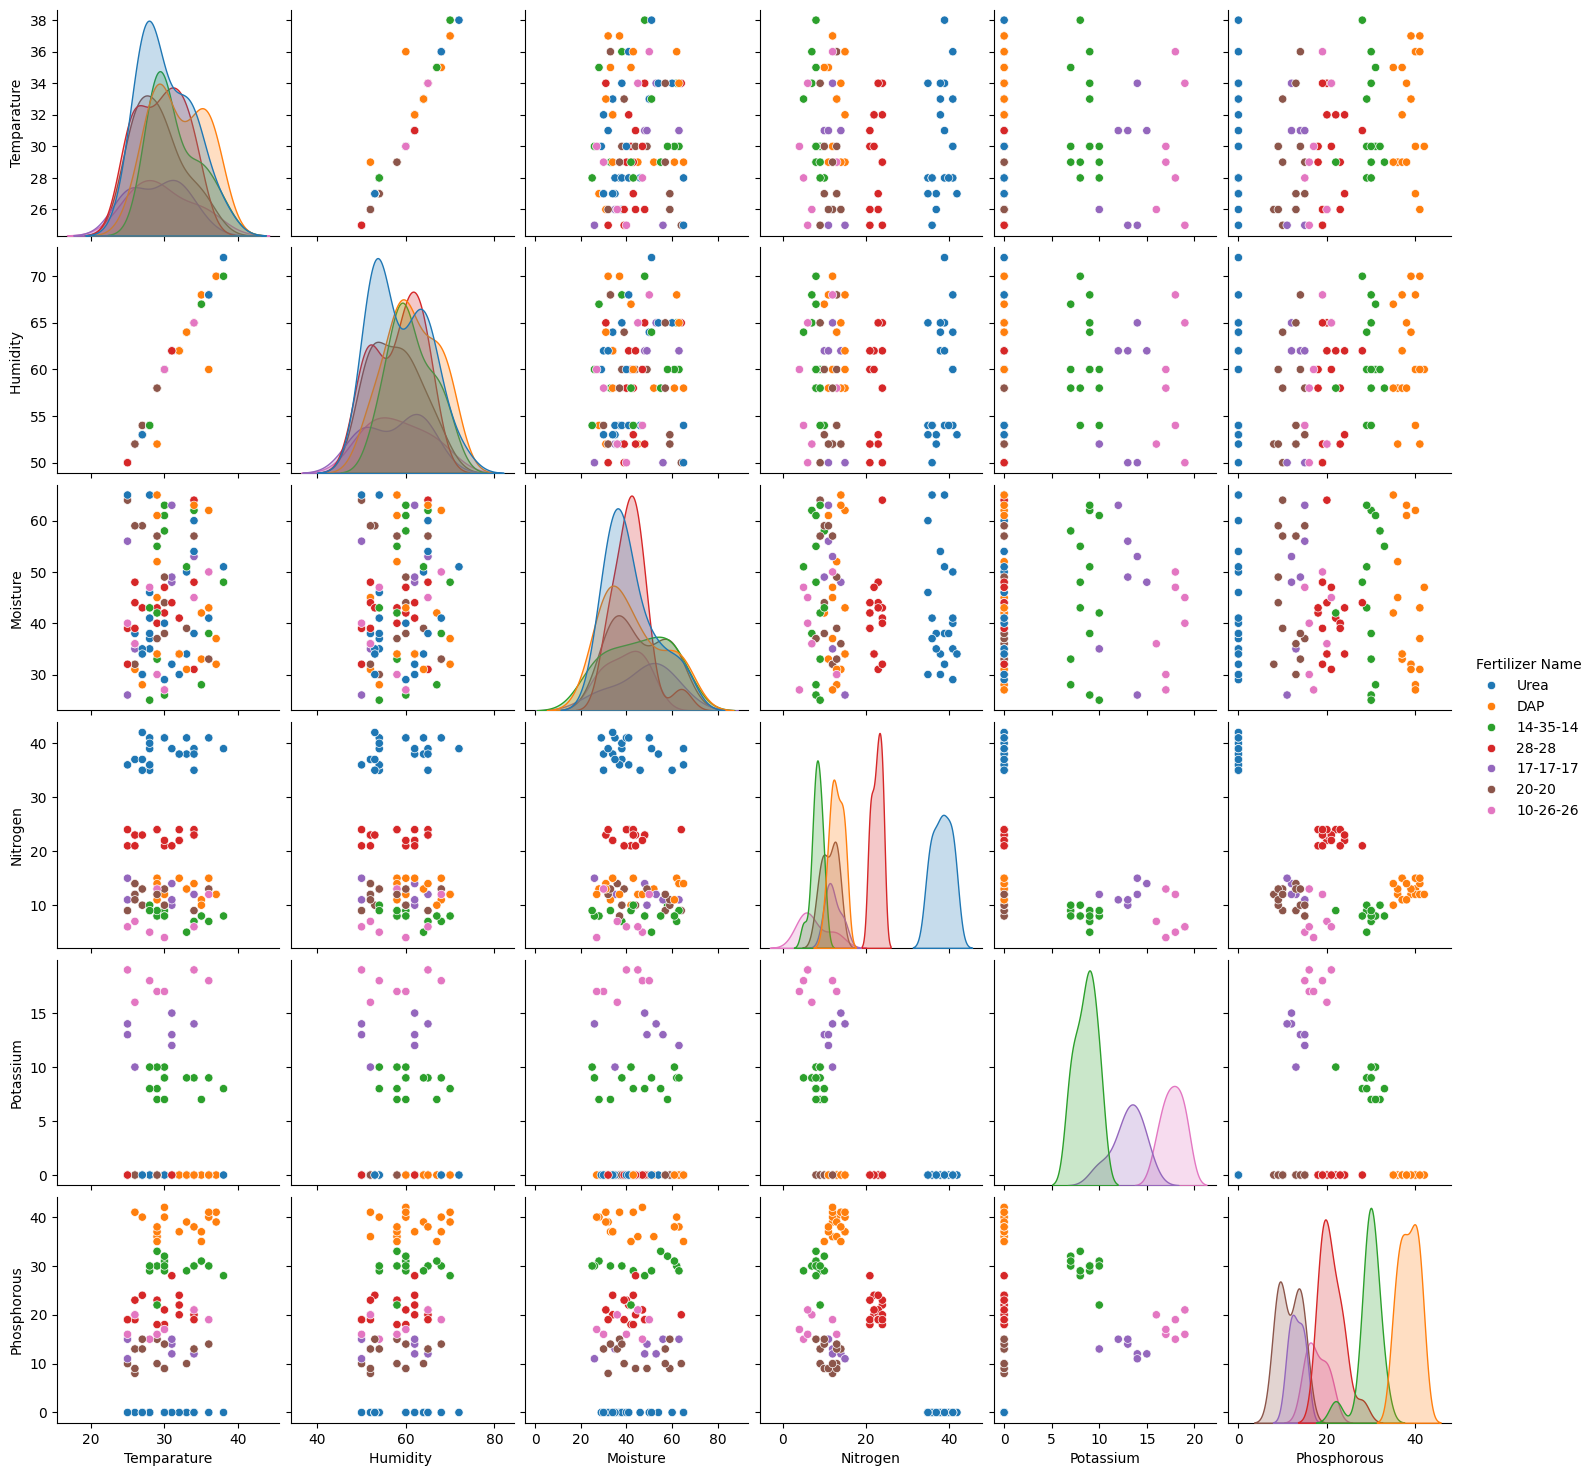

In [4]:
sns.pairplot(df, hue='Fertilizer Name', diag_kind='kde')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])

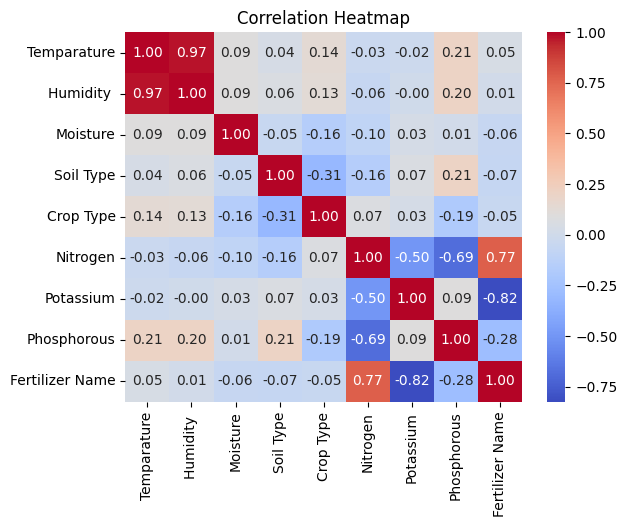

In [6]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X = df.drop('Fertilizer Name', axis = 1)
y = df['Fertilizer Name']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_prednb = naive_bayes.predict(X_test)
accuracynb = accuracy_score(y_test,y_prednb)
print(f'Accuracy Score: {accuracynb:.2%}')

Accuracy Score: 100.00%


In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf.score(X_test,predictions)

1.0

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.multioutput import MultiOutputClassifier

cm = confusion_matrix(y_test, y_pred)

print("Accuracy for Decision Tree:",accuracy_score(y_test, y_pred))

Accuracy for Decision Tree: 1.0


In [14]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_7 <= -0.23
|   |--- feature_5 <= 0.60
|   |   |--- feature_6 <= 0.23
|   |   |   |--- class: 3
|   |   |--- feature_6 >  0.23
|   |   |   |--- feature_6 <= 2.20
|   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  2.20
|   |   |   |   |--- class: 0
|   |--- feature_5 >  0.60
|   |   |--- class: 6
|--- feature_7 >  -0.23
|   |--- feature_6 <= -0.03
|   |   |--- feature_7 <= 0.85
|   |   |   |--- class: 4
|   |   |--- feature_7 >  0.85
|   |   |   |--- class: 5
|   |--- feature_6 >  -0.03
|   |   |--- feature_7 <= 0.23
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.23
|   |   |   |--- class: 1



In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
print('Accuracy for SVM is : {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy for SVM is : 0.80


In [16]:
from sklearn.metrics import classification_report
print("Decision Tree:")
print(classification_report(y_test,y_pred))
print("Naive Bayes:")
print(classification_report(y_test,y_prednb))
print("Random Forest:")
print(classification_report(y_test, predictions))
print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00      

d:\Miniconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Miniconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Miniconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Miniconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:14

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Sequential Model Accuracy: {accuracy:.2%}')


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    BatchNormalization(),
    tf.keras.layers.SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping_rnn])

y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print(f'Simple RNN Model Accuracy: {accuracy_rnn:.2%}')


Epoch 1/50
3/3 [==============================] - 4s 355ms/step - loss: 1.9984 - accuracy: 0.0759 - val_loss: -0.4486 - val_accuracy: 0.0500
Epoch 2/50
3/3 [==============================] - 0s 139ms/step - loss: -6.4452 - accuracy: 0.1519 - val_loss: -2.3739 - val_accuracy: 0.0500
Epoch 3/50
3/3 [==============================] - 0s 80ms/step - loss: -10.7436 - accuracy: 0.1646 - val_loss: -4.2628 - val_accuracy: 0.0500
Epoch 4/50
3/3 [==============================] - 0s 100ms/step - loss: -13.3981 - accuracy: 0.1646 - val_loss: -6.3202 - val_accuracy: 0.0500
Epoch 5/50
3/3 [==============================] - 0s 69ms/step - loss: -15.4385 - accuracy: 0.1646 - val_loss: -8.5315 - val_accuracy: 0.0500
Epoch 6/50
3/3 [==============================] - 0s 70ms/step - loss: -16.9081 - accuracy: 0.1646 - val_loss: -10.7122 - val_accuracy: 0.0500
Epoch 7/50
3/3 [==============================] - 0s 53ms/step - loss: -17.9104 - accuracy: 0.1646 - val_loss: -12.7340 - val_accuracy: 0.0500
Epoc

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    BatchNormalization(),
    tf.keras.layers.LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping_lstm])

y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f'LSTM Model Accuracy: {accuracy_lstm:.2%}')

Epoch 1/50
3/3 [==============================] - 14s 617ms/step - loss: 0.4046 - accuracy: 0.1646 - val_loss: 0.3663 - val_accuracy: 0.0500
Epoch 2/50
3/3 [==============================] - 0s 57ms/step - loss: -0.5465 - accuracy: 0.1646 - val_loss: 0.0016 - val_accuracy: 0.0500
Epoch 3/50
3/3 [==============================] - 0s 48ms/step - loss: -1.7287 - accuracy: 0.1646 - val_loss: -0.4832 - val_accuracy: 0.0500
Epoch 4/50
3/3 [==============================] - 0s 43ms/step - loss: -3.2676 - accuracy: 0.1646 - val_loss: -1.1692 - val_accuracy: 0.0500
Epoch 5/50
3/3 [==============================] - 0s 43ms/step - loss: -5.1389 - accuracy: 0.1646 - val_loss: -2.1324 - val_accuracy: 0.0500
Epoch 6/50
3/3 [==============================] - 0s 38ms/step - loss: -7.3297 - accuracy: 0.1646 - val_loss: -3.4673 - val_accuracy: 0.0500
Epoch 7/50
3/3 [==============================] - 0s 35ms/step - loss: -9.7080 - accuracy: 0.1646 - val_loss: -5.2594 - val_accuracy: 0.0500
Epoch 8/50
3/3

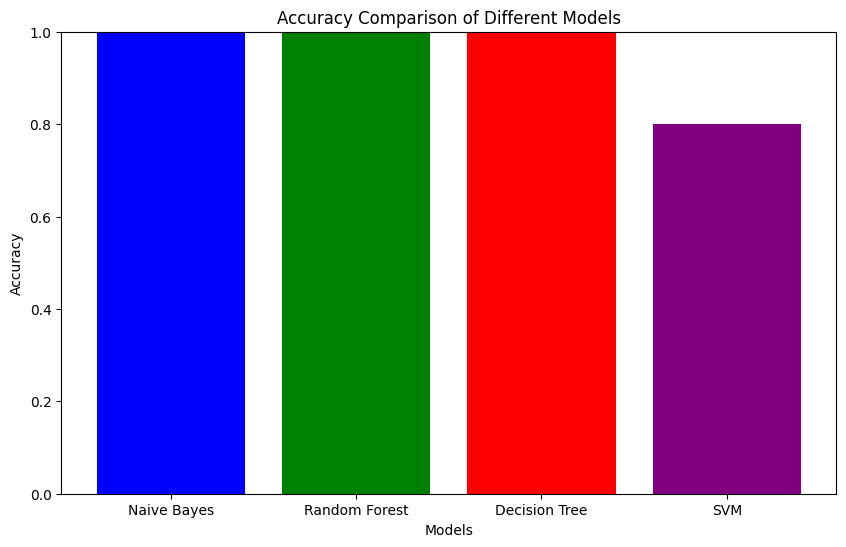

In [18]:
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM']

accuracies = [accuracynb, rf.score(X_test, predictions), accuracy_score(y_test, y_pred),
              svm.score(X_test, y_test)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1]) 
plt.show()

In [ ]:
import pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes, file)

In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
with open('label.pkl', 'wb') as label_file:
    pickle.dump(label_encoder, label_file)